# COGS 108 - Final Project 

# Overview

In this project, I intended to use machine learning model to predict rating using yelp reviews. Compare and contrast different models. the main force is classification predictive modeling. there are several kinds of modeling, For this project, I would use SVM, Random Forest, Logistic Regression, and Naive Bayes. I would determent the best models use accuracy and Precision-Recall Curves. lastly I would use the best models to predict other city park system on yelp review ratings.

# Name & GitHub

- Name: Zedian Zhang
- GitHub Username: zedianzhang

# Research Question

what is the best machine learning algorithm used to analyze yelp review?

## Background and Prior Work

with rapidly increasing use of social media platforms, quick and efficient ways for consumer insight mining should be developed. social media platforms like yelp contain consumer reviews about the place from which important information can be extracted. 97% of consumers regularly read reviews. This information is valuable for both the customers and business.[1] <br>
<br>
One way to understand the review is sentiment classification. There are two ways of separating text, Bag of ward and Term Frequency - Inverse Document Frequency. Bag od ward just counts the appearance of each word and measure the weight of each word relate to the whole text. Next is understanding the foundation of the machine learning algorithm. Machine learning is a field of study and is concerned with algorithms that learn from examples. Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain.[3] This would be a binary classification, rating with 1-3 categories as negative review and 4-5 as positive review. <br>
<br>
Two diagnostic tools that help in the interpretation of forecast for binary classification predictive modeling problems are ROC curves and Precision-Recall curves. ROC Curves summarize the trade between the true positive rate and false-positive rate for a predictive model using different probability thresholds. Precision-Recall Curves summarize the trade off between the true positive rate and positive predictive value for a predictive model using different probability thresholds.[4] The last step, fetch LA park yelp review to predictive.[5]<br>
<br>
References (include links):
- 1)https://www.podium.com/article/online-reviews-worth/
- 2)A6_NaturalLanguageProcessing.ipynb
- 3)https://machinelearningmastery.com/types-of-classification-in-machine-learning/
- 4)https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- 5)https://www.yelp.com/developers/documentation/v3/business_reviews

# Hypothesis


I hypothesize that all classifiers would perform fairly well in this context. our dataset is relatively small, then the time consumed would be short for each algorithm and the algorithms I selected are popular and effective text classifiers. therefore the accuracy of predicting Los Angle parks yelp rating should be above 70%.

# Dataset(s)

One of the following datasets was provided by the instructor for the final project and the other was scraped by myself. 
- Dataset Name: yelp review for SD parks
- Link to the dataset: no link dataset was provided
- Number of observations: 2333 reviews
<br>
- Dataset Name: yelp review for LA parks
- Link to the dataset: no link dataset was provided
- Number of observations: 2718 reviews
Both dataset provides the information on yelp rating and yelp review for parks in Los Angles or San Diego.

# Setup

In [1]:
#import libraries needed for project 
%matplotlib inline
import numpy as ny
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

#install wordcloud
#!pip install wordcloud
#!conda install -c conda-forge imbalanced-learn

from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#import different ML module 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_recall_fscore_support,roc_curve,auc,accuracy_score,precision_recall_curve
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')



# Data Cleaning

check for missing value and remove them if any.

In [2]:
#import dataset
df_reviews=pd.read_csv('../data/yelp_SD_reviews.csv')

In [3]:
df_reviews.isnull().sum()

id        0
rating    0
text      0
dtype: int64

No missing value in dataset

# Data Analysis & Results

To simplify the process, I have converted the rating into Numerical Labels. Covert column rating to positive review or negative reviews(1 indicate positive and 0 indicate negative)

In [4]:
def convert(rating):
    if rating >= 3:
        return 1;
    else:
        return 0;
df_reviews['y']=df_reviews['rating']
df_reviews['y']=df_reviews['y'].apply(convert)
df_reviews

,id,rating,text,y
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,1
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,1
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,1
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,1
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...",1
...,...,...,...,...
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...,1
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...,1
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t...",1
2331,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...,1


### Vectorize reviews 
Vectorize data text with TF-IDF, using TfidfVectorizer form sklearn. transforms text into vector name Reviews_x and the outcome in Reviews_y

In [5]:
tfidf=TfidfVectorizer(analyzer='word',
                     max_features=2000,
                     tokenizer = word_tokenize,
                     sublinear_tf=True)
Reviews_X = tfidf.fit_transform(df_reviews["text"]).toarray()
Reviews_y=df_reviews['y'].to_numpy()

## Spliting the data
I set 75% of the data as the training set to train module and remaining 25% as test set to test module

In [6]:
#randomize the sample at state 40 
train_X, test_X,train_y, test_y, = train_test_split(Reviews_X,
                                               Reviews_y,
                                               test_size = .25,
                                               random_state=40)

### Exploratory data analysis
To have a better undersatanding of our data:

In [7]:
df_reviews['y'].value_counts(normalize=True)

1    0.883412
0    0.116588
Name: y, dtype: float64

Our dataset is largely good reviews, about 10% of the review are considered as bad ones. One way to fix it is oversampling the dataset. the oversampling algorithm I use is the Synthetic Minority Oversampling Technique. SMOTE creates synthetic observations of the minority class (bad reviews) by:
- 1)Finding the k-nearest-neighbors for minority class observations (finding similar observations)
- 2)Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [8]:
sm = SMOTE(random_state=40, ratio = 1.0)
train_X, train_y = sm.fit_sample(train_X, train_y)


Let's have a look at what people say about SD park in a word cloud.

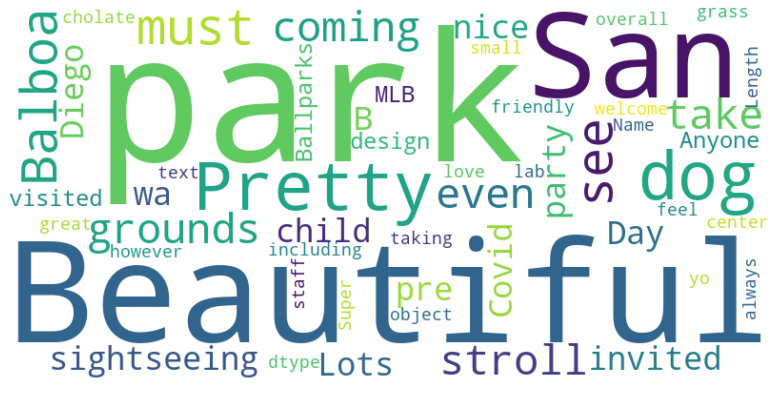

In [9]:
#wordcloud object 
wordcloud=WordCloud(background_color='white',max_words=900,
                    stopwords = stopwords.words('english')
                   ,scale=2).generate(str(df_reviews['text']))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Modelling reviews
#### 1) linear SVM classifier
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. The basics of Support Vector Machines is find the best boundary between two group, then use the boundary to classifiy or predict. 

In [10]:
# train the svm module with train x and train y
svm_clf = SVC(kernel='linear',probability=True,random_state=40)
svm_clf.fit(train_X, train_y)

# predict outcome
predicted_train_y=svm_clf.predict(train_X)
predicted_test_y=svm_clf.predict(test_X)

#save the auccracy for later comparetion
svm_auc=accuracy_score(test_y,predicted_test_y)

In [11]:
print(classification_report(train_y,predicted_train_y))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1542
           1       1.00      0.98      0.99      1542

    accuracy                           0.99      3084
   macro avg       0.99      0.99      0.99      3084
weighted avg       0.99      0.99      0.99      3084



In [12]:
print(classification_report(test_y, predicted_test_y))

              precision    recall  f1-score   support

           0       0.36      0.37      0.36        65
           1       0.92      0.92      0.92       519

    accuracy                           0.86       584
   macro avg       0.64      0.64      0.64       584
weighted avg       0.86      0.86      0.86       584



As seen above the SVM classifier have very hight accuracy on the traning set and test set.

#### 2) Random Forest classifier
Random Forest are made out of decision tree, Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. The main differe between decision tree and random forest is decision tree will formulate some set of rules, which will be used to make the predictions, and random forest algorithm randomly selects observations and features to build several decision trees and then averages the results.

In [13]:
#train classifier
rf_clf=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=40)
rf_clf.fit(train_X, train_y)

# predict outcome
predicted_train_y=rf_clf.predict(train_X)
predicted_test_y=rf_clf.predict(test_X)

#save the auccracy for later comparetion
rf_auc=accuracy_score(test_y,predicted_test_y)

I set the n_estimators to 100 and max depth to 3 to prevent overfitting the module.

In [14]:
print(classification_report(train_y,predicted_train_y))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1542
           1       0.87      0.96      0.91      1542

    accuracy                           0.91      3084
   macro avg       0.91      0.91      0.91      3084
weighted avg       0.91      0.91      0.91      3084



In [15]:
print(classification_report(test_y, predicted_test_y))

              precision    recall  f1-score   support

           0       0.17      0.12      0.14        65
           1       0.89      0.92      0.91       519

    accuracy                           0.83       584
   macro avg       0.53      0.52      0.52       584
weighted avg       0.81      0.83      0.82       584



The report shows that 91% accuracy for the training set and 83% accuracy for the training set. This is lower than SVM test set auccracy.

#### 3)Logistic Regression
Logistic regression is similar to linear regression, except Logistic Regression predicts whether something is True or False. Logistic regression uses the likelihood of sample input to fill a function and predict output with probability.

In [16]:
#train classifier
lr_clf=LogisticRegression(solver='liblinear',random_state=40)
lr_clf.fit(train_X, train_y)

# predict outcome
predicted_train_y=lr_clf.predict(train_X)
predicted_test_y=lr_clf.predict(test_X)

#save the auccracy for later comparetion
lr_auc=accuracy_score(test_y,predicted_test_y)

In [17]:
print(classification_report(train_y,predicted_train_y))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1542
           1       0.98      0.95      0.97      1542

    accuracy                           0.97      3084
   macro avg       0.97      0.97      0.97      3084
weighted avg       0.97      0.97      0.97      3084



In [18]:
print(classification_report(test_y, predicted_test_y))

              precision    recall  f1-score   support

           0       0.42      0.52      0.47        65
           1       0.94      0.91      0.92       519

    accuracy                           0.87       584
   macro avg       0.68      0.72      0.70       584
weighted avg       0.88      0.87      0.87       584



Logistic Regression have the highest accuracy on the training set and test set.

#### 4) Naive Bayes
Naive Bayes take advantage of probability theory and Bayes’ Theorem to predict the tag of a text. They are probabilistic, which means that they calculate the probability of each tag for a given text, and then output the tag with the highest one. The way they get these probabilities is by using Bayes’ Theorem, which describes the probability of a feature, based on prior knowledge of conditions that might be related to that feature.

In [19]:
#train classifier
nb_clf=MultinomialNB()
nb_clf.fit(train_X, train_y)

# predict outcome
predicted_train_y=nb_clf.predict(train_X)
predicted_test_y=nb_clf.predict(test_X)

#save the auccracy for later comparetion
nb_auc=accuracy_score(test_y,predicted_test_y)

In [20]:
print(classification_report(train_y,predicted_train_y))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1542
           1       0.99      0.91      0.94      1542

    accuracy                           0.95      3084
   macro avg       0.95      0.95      0.95      3084
weighted avg       0.95      0.95      0.95      3084



In [21]:
print(classification_report(test_y, predicted_test_y))

              precision    recall  f1-score   support

           0       0.40      0.66      0.50        65
           1       0.95      0.87      0.91       519

    accuracy                           0.85       584
   macro avg       0.68      0.77      0.70       584
weighted avg       0.89      0.85      0.87       584



Logistic Regression have the second highest accuracy on the training set and test set.

## Compare Machine Learning algorithm

Making a plot of auccracy, fisrt creat a datframe with all the accuracy and plot them using mathplot 

In [22]:
svm_auc_arr = ny.array(["SVM",svm_auc*100])
rf_auc_arr = ny.array(["Random Forest",rf_auc*100])
lr_auc_arr = ny.array(["Logistic Regression",lr_auc*100])
nb_auc_arr = ny.array(["Naive Bayes",nb_auc*100])

#a dataframe with all the auccary form test set
auc_df = pd.DataFrame(ny.array([svm_auc_arr,rf_auc_arr,lr_auc_arr,nb_auc_arr]),
                   columns=['module', 'auc'])
auc_df = auc_df.astype({'auc':float})

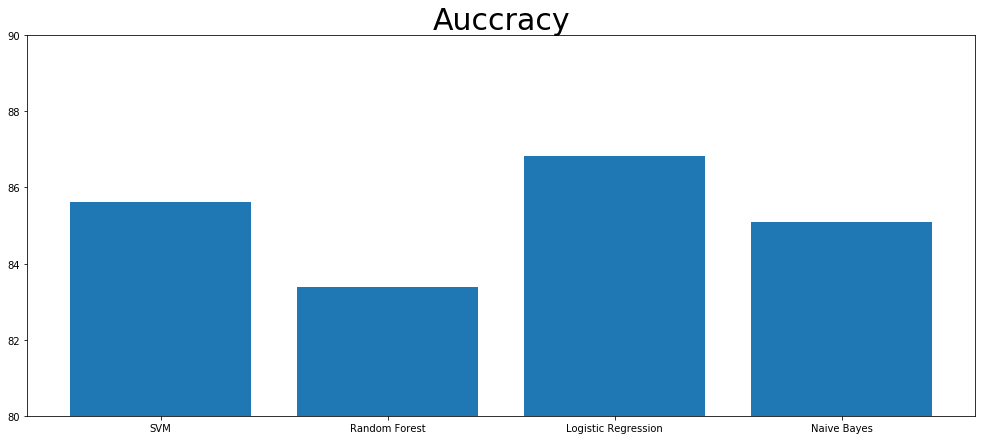

In [23]:
# auccracy bar plot
plt.figure(figsize=(17,7))
plt.bar(auc_df['module'],auc_df['auc'])
plt.ylim(80,90)
plt.title('Auccracy',fontsize=30)

plt.show()

This plot is cut out from range 80 to 90, this may be miss leading. However, we know that all of them have about the same accuracy, so there is no reason to use accuracy as a main factor to determine a better performance module. To further compare the model performances, Let's look at the ROC_curve next.

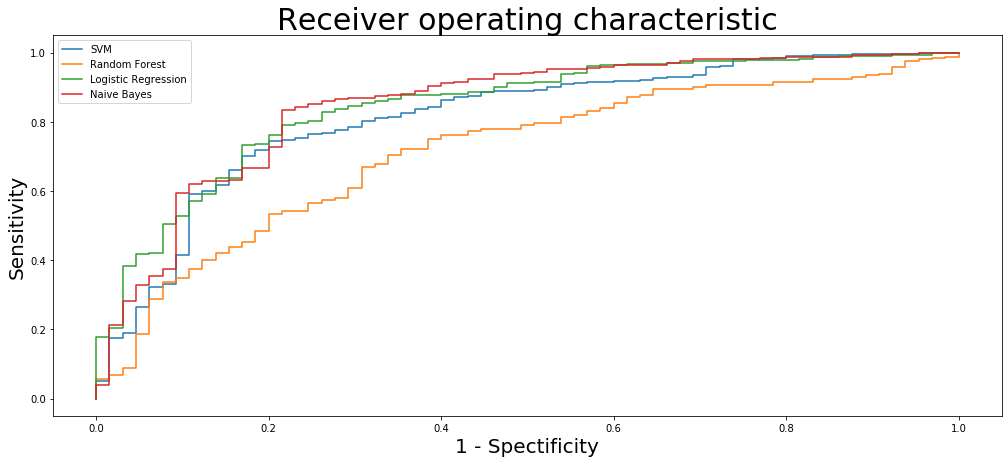

In [24]:
plt.figure(figsize=(17,7))
#ploting linear SVM classifier
svm_probs=svm_clf.predict_proba(test_X)
svm_probs=svm_probs[:,1]
svm_fpr,svm_tpr,_=roc_curve(test_y,svm_probs,pos_label=1)
plt.plot(svm_fpr,svm_tpr,label='SVM')

#ploting Random Forest classifier classifier
rf_probs=rf_clf.predict_proba(test_X)
rf_probs=rf_probs[:,1]
rf_fpr,rf_tpr,_=roc_curve(test_y,rf_probs,pos_label=1)
plt.plot(rf_fpr,rf_tpr,label='Random Forest')

#ploting Logistic Regression classifier
lr_probs=lr_clf.predict_proba(test_X)
lr_probs=lr_probs[:,1]
lr_fpr,lr_tpr,_=roc_curve(test_y,lr_probs,pos_label=1)
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression')

#ploting Naive Bayes classifier
nb_probs=nb_clf.predict_proba(test_X)
nb_probs=nb_probs[:,1]
nb_fpr,nb_tpr,_=roc_curve(test_y,nb_probs,pos_label=1)
plt.plot(nb_fpr,nb_tpr,label='Naive Bayes')

#creating labels
plt.title('Receiver operating characteristic',fontsize=30)
plt.xlabel('1 - Spectificity',fontsize=20)
plt.ylabel('Sensitivity',fontsize=20)
plt.legend()
plt.show()

From the graph above, Logistic Regression has the highest sensitivity score which means that Logistic Regression has a higher true positive rate. Nevertheless, SVM and Naive Bayes perform fairly well, then I would use the Logistic Regression that I trained to predict Los Angeles city parks on yelp review ratings.

### Predict Los Angeles city parks on yelp rating
I had scraped the data myself using yelp fusion API. The parameters that I used to search businesses are listed:
- "categories": 'parks,beaches,arts',
- "location":"Los Angles",
- "state": "California",
and I only scrape the first 1000 businesses on the list. Now import dataset, numerical Labels and vectorize data text

In [25]:
#import dataset
df_reviews_la=pd.read_csv('../data/yelp_LA_reviews.csv')
df_reviews_la

,rating,reviews
0,5,The Hollywood Bowl is iconic as the sign thoug...
1,5,9/10/2019 Joan Jett and Heart with Elle King (...
2,5,The Hollywood Bowl has always been a great ven...
3,5,Cute and fun museum. Visited pre-covid and the...
4,5,"Man, I love the Broad. This is pre COVID-19 in..."
...,...,...
2713,5,"Oh my, where shall can I start? I would first..."
2714,5,I came across Patti by chance a couple years a...
2715,5,Blown away by this guy--he's absolutely the BE...
2716,5,Awesome magician!!!! Hired Mickey to come to ...


In [26]:
#import dataset
df_reviews_la=pd.read_csv('../data/yelp_LA_reviews.csv')
#numerical labels
df_reviews_la['y']=df_reviews_la['rating']
df_reviews_la['y']=df_reviews_la['y'].apply(convert)
#vectorize data text
Reviews_la_X = tfidf.fit_transform(df_reviews_la["reviews"]).toarray()
Reviews_la_y=df_reviews_la['y'].to_numpy()
#perdict
predicted_la_y=lr_clf.predict(Reviews_la_X)
print(classification_report(Reviews_la_y,predicted_la_y))

              precision    recall  f1-score   support

           0       0.08      0.18      0.11       175
           1       0.94      0.87      0.90      2543

    accuracy                           0.82      2718
   macro avg       0.51      0.52      0.51      2718
weighted avg       0.88      0.82      0.85      2718



An 82% accuracy is higher than what I except.

# Ethics & Privacy

One of the datasets was given for the final project, so I have permission to use it. The other dataset was collected from the same website. When generating API key, I have signed up for academic use. Because the project did not require any person, I did not collect any personal information from yelp reviews. as been said, I have no bias when collecting data, I only collect data that match the requirement. I did not priority any park over the othe, and all the information are public information in yelp's website.<br>
<br>
There are more considerations are ethics than privacy in the analysis, Firstly, I only used the data on one city in the US. there is a danger that use this model to describe parks all over the country, which would be wrong. The reason I choose Los Angles for my prediction is they are at similar geographic locations. Also, the data only have the information on yelp reviews, it is crucial to use any model to against any parks system. Lastly, the performance of any model though out the process and algorithm itself, there is no best model, only the best performance on a specific task.

# Conclusion & Discussion

In this project, I tried to compare the performance of different machine learning model by predicting yelp rating, I compute 4 different models, Next, I look at the accuracy and the ROC curve of the four models, then I decided to use Logistic Regression which has the highest accuracy and higher true positive rate. Finally, I used the Logistic Regression model to predict la yelp review, and the accuracy used to predict la yelp is 82%, this supports my hypothesis. <br>
<br>
There were several limitations to this project. First, the dataset is imbalance between reviews. A majority of reviews are positive reviews. I oversampling the date to balance the sample which decrease the accuracy of the model. In the convert function, I have make ratings with 3 as positive reviews, which may have imbalanced data more. I am still debating on whether 3 should be positive or not. People usually go to parks to relax, so they would more likely to leave good reviews, also parks are designed to have fun. Secondly, the data size is not larger enough to see the train time between models, I can't tell which model takes the least time. Another limitation is I analyzed that the yelp review text is mostly adjective, and adjectives are easy to analyze. Another limitation is that there are oher ferture need to be consider like the geographic location when analyze text.<br>
<br>
This project may helpful when someone trying to understand machine learning algorithms and how to apply them, also this project may be helpful for businesses when they try to understand or predict consumer behavior. Nevertheless,  recommending system uses a lot of classification before making a decision.
